(ftcs_scheme)=
# Forward Time Centred Space (FTCS) scheme
```{index} FTCS scheme
```
[Forward Time Centred Space](https://en.wikipedia.org/wiki/FTCS_scheme) (FTCS) scheme is a method of solving {ref}`heat equation <heat_separation_of_variables>` (or in general parabolic PDEs). In this scheme, we approximate the spatial derivatives at the current time step and the time derivative between current and new time step:

\\[\quad t = t_0+n\Delta t,\quad x=x_0+i\Delta x,\\\\\\
\frac{\partial u}{\partial t}\approx \frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t},\\\\\\
\frac{\partial u}{\partial x}\approx \frac{u_{i+1}^{n}-u_{i-1}^{n}}{2\Delta x},\quad \frac{\partial^2 u}{\partial x^2}\approx \frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}.\\]

The FCTS scheme is first order in time and up to 2nd order in space. It can be always rearranged into the following form:
\\[u_{i}^{n+1}=u_{i}^{n}+\Delta t f(u_{i}^{n}, u_{i+1}^{n}, u_{i-1}^{n}).\\]

```{admonition} Exercise
:class: dropdown
Derive an FTCS solution to the equation:
\\[\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2}.\\]

Forward difference in time:
\\[\frac{\partial u}{\partial t}= \frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}.\\]

Central difference in space:
\\[\frac{\partial^2 u}{\partial x^2}= \frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}.\\]

Differentials combined in our equation:
\\[\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}.\\]

Rearrange the terms to get:
\\[u_{i}^{n+1}=u_{i}^{n}+D\frac{\Delta t}{\Delta x^2}\Big(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}\Big).\\]


```

````{margin} Implicit scheme
```{index} Implicit scheme
```
Implicit schemes calculate new time step values based on the new time step and the current values. These are harder to program as they requires iteration and/or matrix inversion at each time step. Solutions are stable for much larger time steps, some are even unconditionally stable.
````

## Numerical stability

```{index} Explicit scheme
```
FCTS is an [explicit scheme](https://en.wikipedia.org/wiki/Explicit_and_implicit_methods), where new time step value depends only on the current time step value. These schemes are quick to program and each time step runs quickly. A disadvantage to such schemes is that sometimes very small \\(\Delta t\\) are required for numerical stability.

Numerical stability is an issue in any explicit scheme as any effect can only move by a maximum of one spatial grid block in one time step. For example, a purely 1st order (convective) system FTCS is unconditionally unstable:
\\[\frac{\partial u}{\partial t}=-\nu\frac{\partial u}{\partial x}\quad\rightarrow\quad u_{i}^{n+1}=u_{i}^{n}-\Delta t \nu \frac{u_{i+1}^{n}-u_{i-1}^{n}}{2\Delta x}.\\]


### Lax-Friedrichs scheme

For a purely convective equation a simple substitution can make it stable. For example, if we substitute \\(u_{i}^{n}\\) in the time derivative with \\(\frac{u_{i+1}^{n}+u_{i-1}^{n}}{2}\\), the we get a solution:
\\[u_{i}^{n+1}=\frac{u_{i+1}^{n}+u_{i-1}^{n}}{2}-\Delta t \nu \frac{u_{i+1}^{n}-u_{i-1}^{n}}{2\Delta x}.\\]

This solution is stable if [CFL condition](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition) is met:
\\[\Delta t \leq \frac{\Delta x}{|\nu|}.\\]

Why does [Lax-Friedrichs](https://en.wikipedia.org/wiki/Lax%E2%80%93Friedrichs_method) method makes an FTCS scheme stable?

\\[\text{LAX:}\quad \frac{\partial u}{\partial t}=-\nu\frac{\partial u}{\partial x} \quad \rightarrow \quad u_{i}^{n+1}=u_{i+1}^{n}\Big(\frac{1}{2}-\frac{\Delta t \nu}{2\Delta x}\Big)+u_{i-1}^{n}\Big(\frac{1}{2}+\frac{\Delta t \nu}{2\Delta x}\Big).\\]

\\[\text{FCTS:}\quad\frac{\partial u}{\partial t}=-\nu \frac{\partial u}{\partial x}+D\frac{\partial^2 u}{\partial x^2}\quad\rightarrow\quad u_{i}^{n+1}=u_{i}^{n}\Big(1-\frac{2D\Delta t}{\Delta x^2}\Big)+u_{i+1}^{n}\Big(\frac{D\Delta t}{\Delta x^2}-\frac{\Delta t\nu}{2\Delta x}\Big)+\\\\\\
+u_{i-1}^{n}\Big(\frac{D\Delta t}{\Delta x^2}+\frac{\Delta t\nu}{2\Delta x}\Big).\\]

These two approximations are equivalent, if
\\[D=\frac{\Delta x^2}{2\Delta t}.\\]

The Lax-Friedrichs scheme introduces thus an artificial (numerical) diffusion. The FTCS scheme for a convective diffusion equation is stable if:
\\[\Delta t \leq \frac{\Delta x^2}{2D}\\]
and
\\[\Delta t \leq \frac{\Delta x}{|\nu|}.\\]

The conditions must be met at every point in the domain.

## Heat transfer solution with FTCS method

We will use an FTCS approximation of
\\[\frac{\partial T}{\partial t}=k\frac{\partial^2 T}{\partial x^2}\\]
to calculate the evolution of temperature in a rod of length 1. The initial temperature of the rod will be set at 100 but the ends of the rod will be kept constant at 0. The heat conductivity will be set at \\(k=0.01\\). The rod will be divided into 100 intervals (101 points).

At first we will need to discretise the problem. We will expand all terms with forward difference for time derivative and central difference for spatial derivative:

\\[\frac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}=k\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\Delta x^2},\\\\\\
T_{i}^{n+1}=T_{i}^{n}+\frac{k\Delta t}{\Delta x^2}\Big(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\Big).\\]

From the CFL condition, we know that for the solution to be stable, we need to ensure that:
\\[\Delta t \leq \frac{\Delta x^2}{2k}.\\]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

Set up variables and find maximum time step:

In [2]:
n = 101

T_old = np.zeros(n)
T_new = np.zeros(n)

for i in range(1,n-1):
    T_old[i] = 100.

l = 1
dx = l/(n-1)
print("dx = %.2f" % dx)

k = 0.01
dt_max = dx**2/(2*k)
dt = 0.2 * dt_max

print("Maximum dt = %.4f." % dt_max)
print("Used dt = %.4f." % dt)

dx = 0.01
Maximum dt = 0.0050.
Used dt = 0.0010.


Run the loop until temperature in the middle reaches 50:

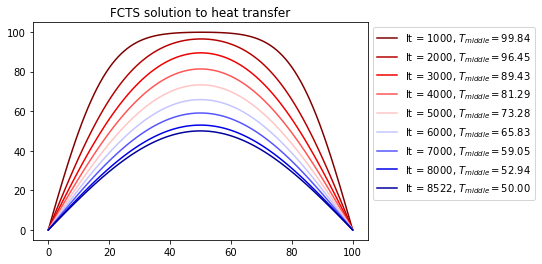

In [3]:
count = 0
count2 = 0
colors = plt.cm.seismic_r(np.linspace(0,1,10))

while T_old[int(n/2)]>50.0:
    
    for i in range(1,n-1):
        T_new[i] = T_old[i]+dt*k*(T_old[i+1]-2*T_old[i]+T_old[i-1])/dx**2
        
    T_old = T_new
    count = count + 1
    
    if count%1000==0:
        
        plt.plot(T_new, color=colors[count2], label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
    
        count2 = count2 + 1

plt.plot(T_new, color=colors[count2], label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
plt.title("FCTS solution to heat transfer")
plt.legend(bbox_to_anchor=[1,1])
plt.show()

The solution was obtained after 8,522 iterations. 


What happens when \\(\Delta t\\) is larger than the one given by the CFL condition?

dx = 0.01
Maximum dt = 0.0050.
Used dt = 0.0100.


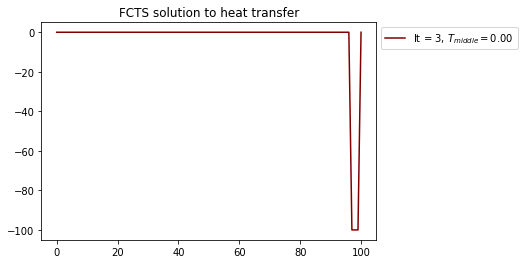

In [4]:
n = 101

T_old = np.zeros(n)
T_new = np.zeros(n)

for i in range(1,n-1):
    T_old[i] = 100.

l = 1
dx = l/(n-1)
print("dx = %.2f" % dx)

k = 0.01
dt_max = dx**2/(2*k)
dt = 2 * dt_max

print("Maximum dt = %.4f." % dt_max)
print("Used dt = %.4f." % dt)

count = 0
count2 = 0
colors = plt.cm.seismic_r(np.linspace(0,1,20))

while T_old[int(n/2)]>50.0:
    
    for i in range(1,n-1):
        T_new[i] = T_old[i]+dt*k*(T_old[i+1]-2*T_old[i]+T_old[i-1])/dx**2
        
    T_old = T_new
    count = count + 1
    
    if count%1000==0:
        plt.plot(T_new, color=colors[count2], label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
    
        count2 = count2 + 1

plt.plot(T_new, color=colors[count2], label="It = %g, $T_{middle}=%.2f$" % (count,T_old[int(n/2)]))
plt.title("FCTS solution to heat transfer")
plt.legend(bbox_to_anchor=[1,1])
plt.show()

We can see that the solution went unstable immediately for a larger \\(\Delta t\\).